# EDA(Exploratory Data Analysis)

EDA on Salary of Data Scientist 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import Data set

data = pd.read_csv("Data Science Jobs Salaries.csv")

In [3]:
# Read first 10 records

data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
5,2021e,SE,FT,Data Analytics Manager,120000,USD,120000,US,100,US,M
6,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
7,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L
8,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
9,2021e,SE,FT,Data Science Engineer,159500,CAD,127543,CA,50,CA,L


In [4]:
# Last 10 records

data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
5,2021e,SE,FT,Data Analytics Manager,120000,USD,120000,US,100,US,M
6,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
7,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L
8,2020,MI,FT,Data Engineer,65000,EUR,74130,AT,50,AT,L
9,2021e,SE,FT,Data Science Engineer,159500,CAD,127543,CA,50,CA,L


In [5]:
# Data size

data.shape

(245, 11)

In [6]:
# How the Data looks like

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [7]:
# Checking any missing values

data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Describe the Dataset

data.describe()

,salary,salary_in_usd,remote_ratio
count,2.450000e+02,245.000000,245.000000
mean,5.025418e+05,99868.012245,69.183673
std,2.276230e+06,83983.326949,37.593421
min,4.000000e+03,2876.000000,0.000000
25%,6.000000e+04,45896.000000,50.000000
50%,1.030000e+05,81000.000000,100.000000
75%,1.740000e+05,130000.000000,100.000000
max,3.040000e+07,600000.000000,100.000000


In [9]:
# Columns

data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [10]:
table = pd.pivot_table(data, values='salary_in_usd', 
                   columns=['experience_level'],
                   index= ['job_title'],
                   aggfunc= np.median
                  )
data_jt = pd.DataFrame(table)
data_jt

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,NaN,NaN,5423.0,NaN
AI Scientist,15051.0,NaN,NaN,55000.0
Applied Data Scientist,NaN,NaN,54376.0,NaN
Applied Machine Learning Scientist,NaN,NaN,423000.0,NaN
BI Data Analyst,9272.0,150000.0,98000.0,NaN
Big Data Architect,NaN,NaN,NaN,99956.0
Big Data Engineer,11084.5,NaN,20335.5,111535.5
Business Data Analyst,79800.5,NaN,135000.0,NaN
Cloud Data Engineer,NaN,NaN,89514.0,160000.0


# 1. Mean salary by each level of experience

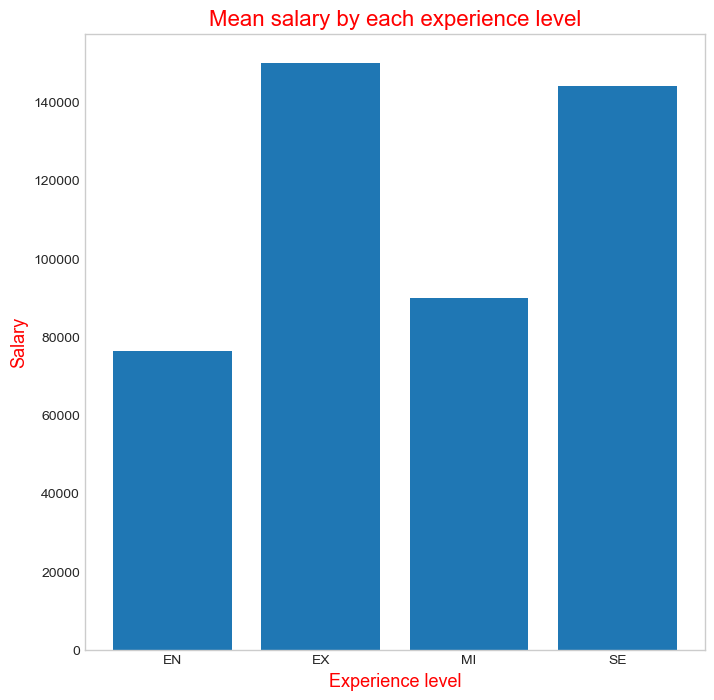

In [11]:
plt.style.use("seaborn-whitegrid")
arr = np.array(data.groupby('experience_level').salary.median())

exp_lev = np.array(['EN','EX','MI','SE'])

fig, ax = plt.subplots()

ax.bar(exp_lev,arr)
ax.set_title("Mean salary by each experience level",fontdict={'size':16,'color':'red'})
ax.set_xlabel("Experience level",fontdict={'size':13,'color':'red'})
ax.set_ylabel("Salary",fontdict={'size':13,'color':'red'})
ax.grid()

fig.set_size_inches(8,8)
plt.show()

In [12]:
# Insights:

'''In above plot we can know what is the avearge salary is being paid to by expereince level of employees.

We can see that EX (Executives) are having highest mean salary'''

'In above plot we can know what is the avearge salary is being paid to by expereince level of employees.\n\nWe can see that EX (Executives) are having highest mean salary'

# 2. Distribution curve of salary in USD

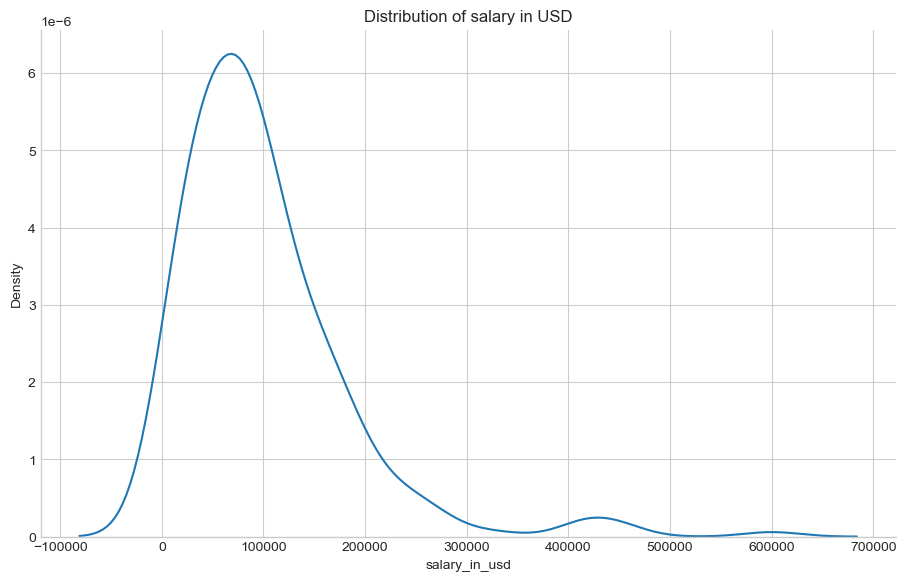

In [13]:
g = sns.displot(data=data, x='salary_in_usd', kind='kde', legend=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

# 3. Histogram of salary in USD


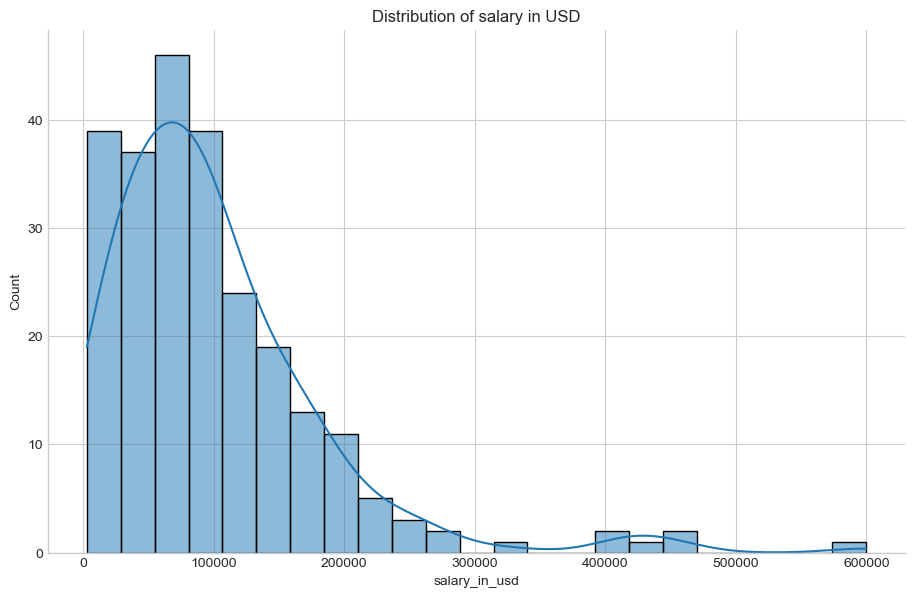

In [14]:
g = sns.displot(x=data['salary_in_usd'], data=data, kde=True)
plt.title('Distribution of salary in USD')
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

In [15]:
# Insights:

'''Above distritbution plots show us how salaries in USD is dstributed from lowest to highest salaries.

As you can see there is only a salary which as high as 600k while most of them is around 80-90k.'''

'Above distritbution plots show us how salaries in USD is dstributed from lowest to highest salaries.\n\nAs you can see there is only a salary which as high as 600k while most of them is around 80-90k.'

# 4. Experience level VS. Remote ratio


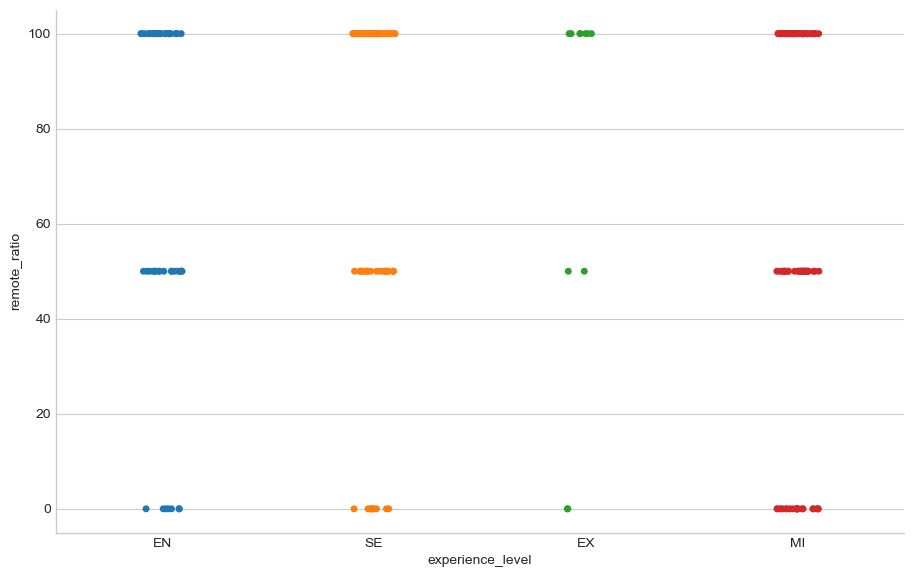

In [16]:
g = sns.catplot(x='experience_level', y='remote_ratio', data=data)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

# 5. Salary in USD for each type of employment

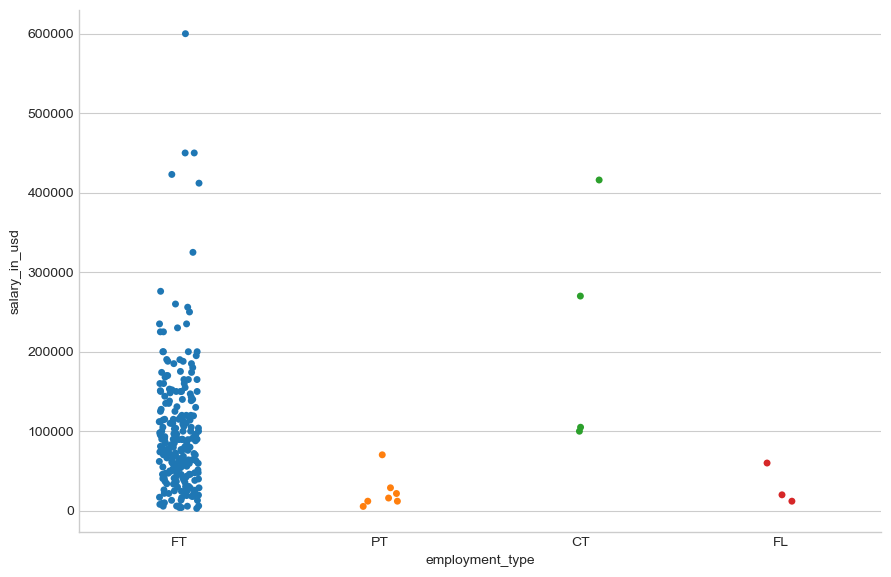

In [17]:
g = sns.catplot(x='employment_type', y='salary_in_usd', data=data)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

In [18]:
# Insights:

# What is the distribution of salaries by each emplyment type?? this plot shows exactly the same

# 6. Salary in USD for each level of experience 

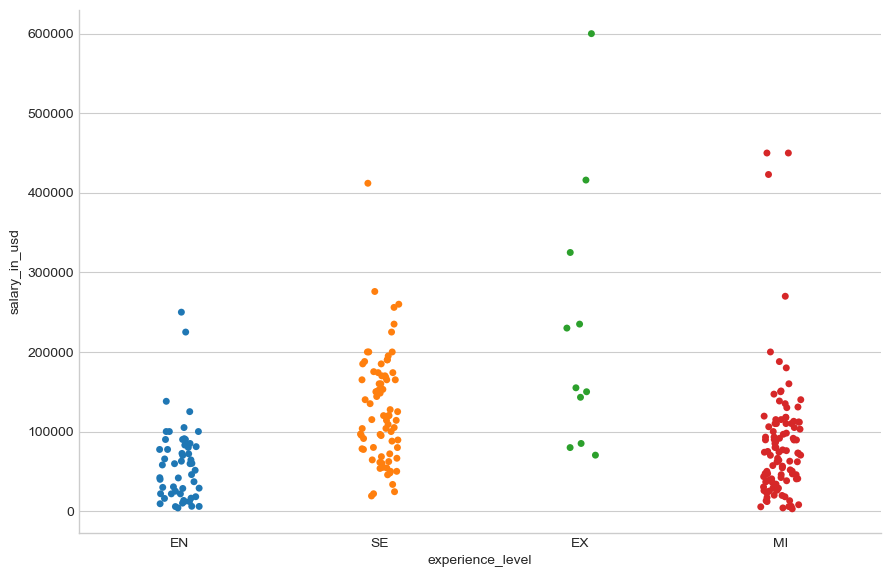

In [19]:
g = sns.catplot(x='experience_level', y='salary_in_usd', data=data)
g.fig.set_figwidth(10)
g.fig.set_figheight(6) 

In [20]:
# Insights:

# What is the distribution of salaries by each expereince level?? this plot shows exactly the same

In [21]:
#total number of unique employees residence

data['employee_residence'].nunique()

45

# 7. Top 5 Employee residence with highest salary paid

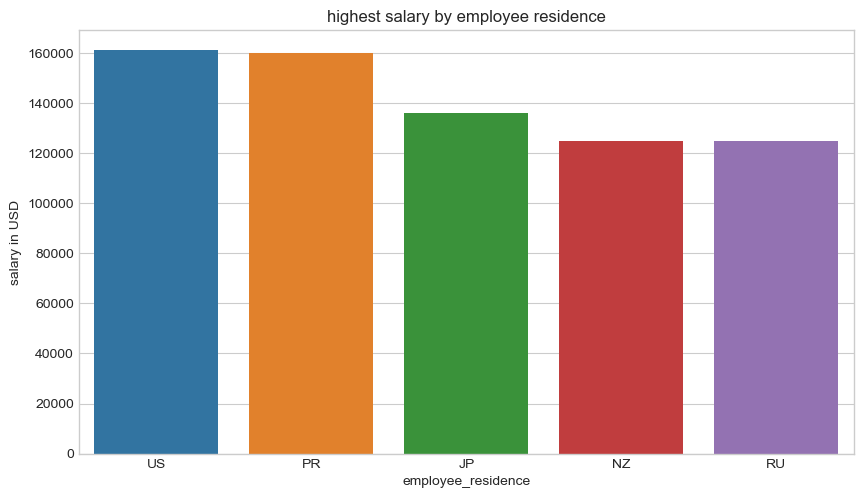

In [22]:
res = data.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=False)
res = res.head()
plt.figure(figsize=(10,5.5))
sns.barplot(x=res.index, y=res.values)
plt.title('highest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

# 8. Last 5 employee residence with least salary paid


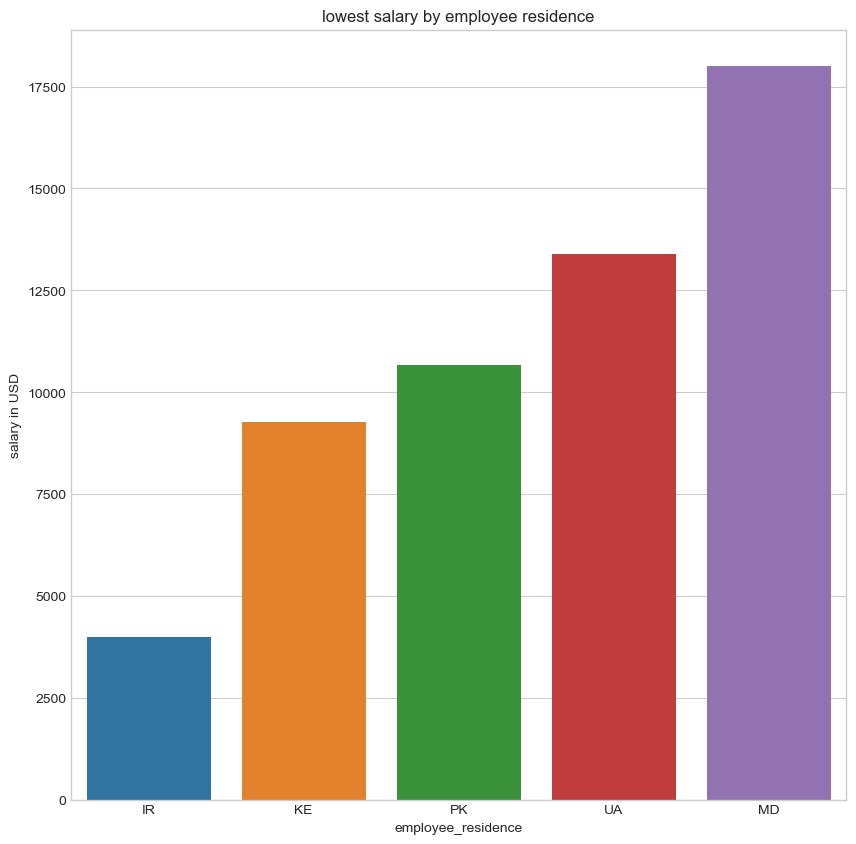

In [23]:
res1 = data.groupby('employee_residence').salary_in_usd.mean().sort_values(ascending=True)
res1 = res1.head()

plt.figure(figsize=(10,10))
sns.barplot(x=res1.index, y=res1.values)
plt.title('lowest salary by employee residence')
plt.ylabel('salary in USD')
plt.show()

# 9. Salary paid by company size

Text(0.5, 1.0, 'Salary by company size')

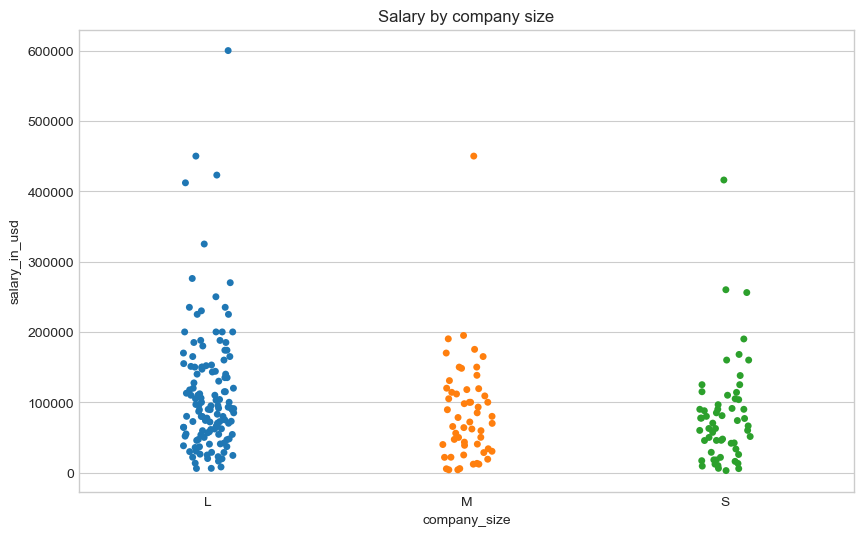

In [24]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data['company_size'], y=data['salary_in_usd'], data=data).set_title('Salary by company size')

In [25]:
# Insights:

'''What is the distribution of salaries by company size?? this plot shows exactly the same

We can learn that large comapnies are paying higher than medium and smaller ones'''

'What is the distribution of salaries by company size?? this plot shows exactly the same\n\nWe can learn that large comapnies are paying higher than medium and smaller ones'

# 10. Salary paid at each remote ratio


Text(0.5, 1.0, 'Salary by remote ratio')

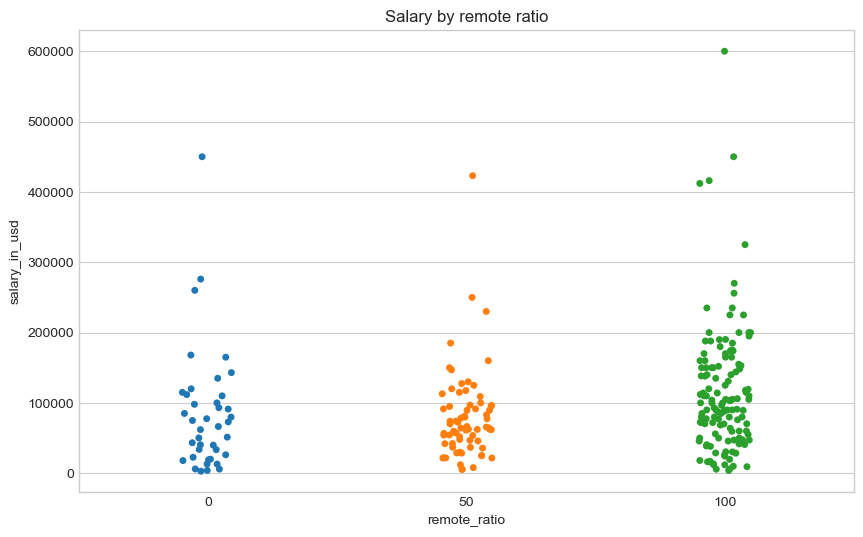

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data['remote_ratio'], y=data['salary_in_usd'], data=data).set_title('Salary by remote ratio')

In [27]:
# Insights:

'''What is the distribution of salaries by remote ration? this plot shows exactly the same

We can learn that there more employees working 100% remote than full office or partial WFH.'''

'What is the distribution of salaries by remote ration? this plot shows exactly the same\n\nWe can learn that there more employees working 100% remote than full office or partial WFH.'

# 11. Relative share of employees by remote work


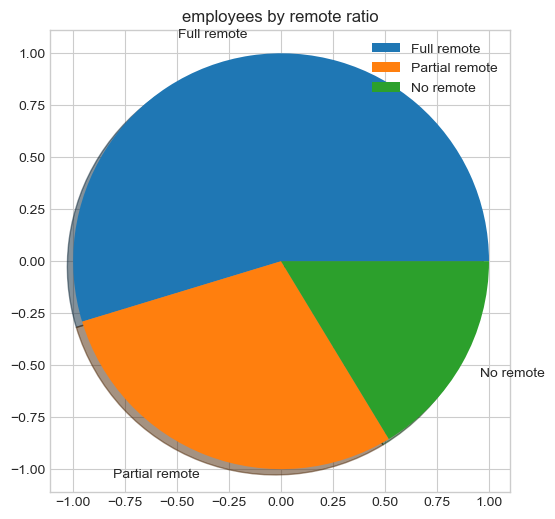

In [28]:
remo = np.array(data['remote_ratio'].value_counts(sort=True))

labels = ['Full remote', 'Partial remote', 'No remote']

plt.figure(figsize=(6,6))
plt.pie(remo, labels=labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by remote ratio')
plt.show()

In [29]:
# Insights:

# We can learn that more than 50% of the employees are working remote

# 12. Relative share of employees by company size


L    132
M     55
S     58
Name: company_size, dtype: int64
the company size labels are:  ['L', 'M', 'S']


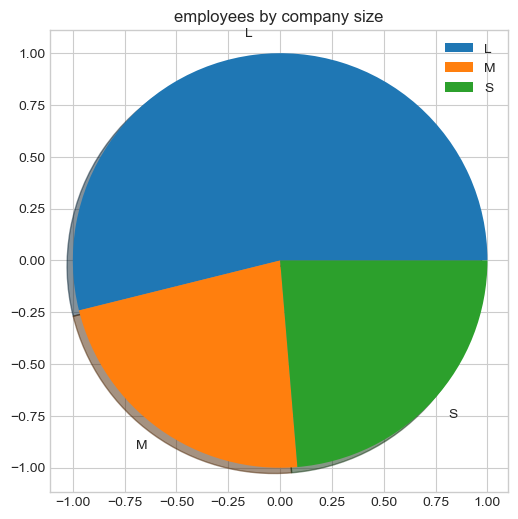

In [30]:
coms = data['company_size'].value_counts(sort=False)
print(coms)
Labels = [x for x in data['company_size'].unique()]
print('the company size labels are: ', Labels)
plt.figure(figsize=(6,6))
plt.pie(coms.values, labels=Labels, shadow=True, frame=True)
plt.legend()
plt.title('employees by company size')
plt.show()

# 13. Pivot table of maximum salary by company size and remote ratio


In [31]:
t2 = pd.pivot_table(data,
                   values='salary_in_usd',
                   index='remote_ratio',
                   columns='company_size',
                   aggfunc= np.max
                   )
pd.DataFrame(t2)

company_size,L,M,S
remote_ratio,,,
0,276000,450000,260000
50,423000,109024,160000
100,600000,195000,416000


In [32]:
'''Here we can see that at large and small comany 100% remote workers are 
getting paid higher than workers with 0% remote ration. 
it is possible because senior managers are wokring remote than juniors.'''

'Here we can see that at large and small comany 100% remote workers are \ngetting paid higher than workers with 0% remote ration. \nit is possible because senior managers are wokring remote than juniors.'

# 14. Numebr of employees by year of joining


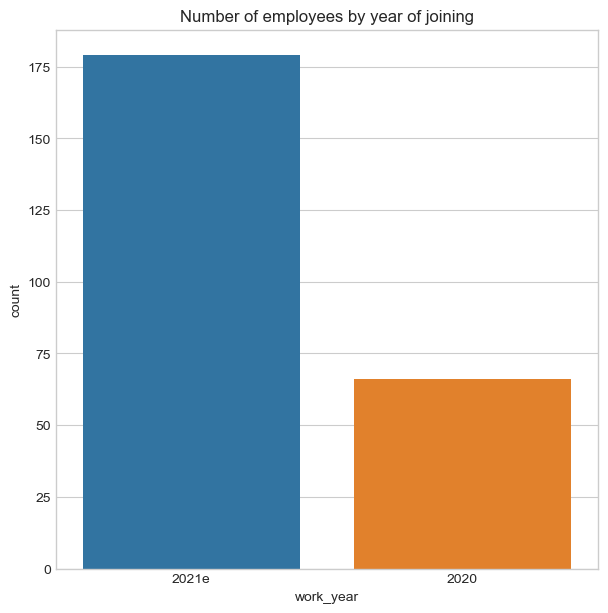

In [33]:
plt.figure(figsize=(7,7))
sns.countplot(x=data['work_year'], data=data)
plt.title('Number of employees by year of joining')
plt.show()

In [34]:
# Insights:

# Almost 185 employees are estimated to join in 2021

# 15. Number of employees by Exp. level, Employment type, Company size and Remote ratio

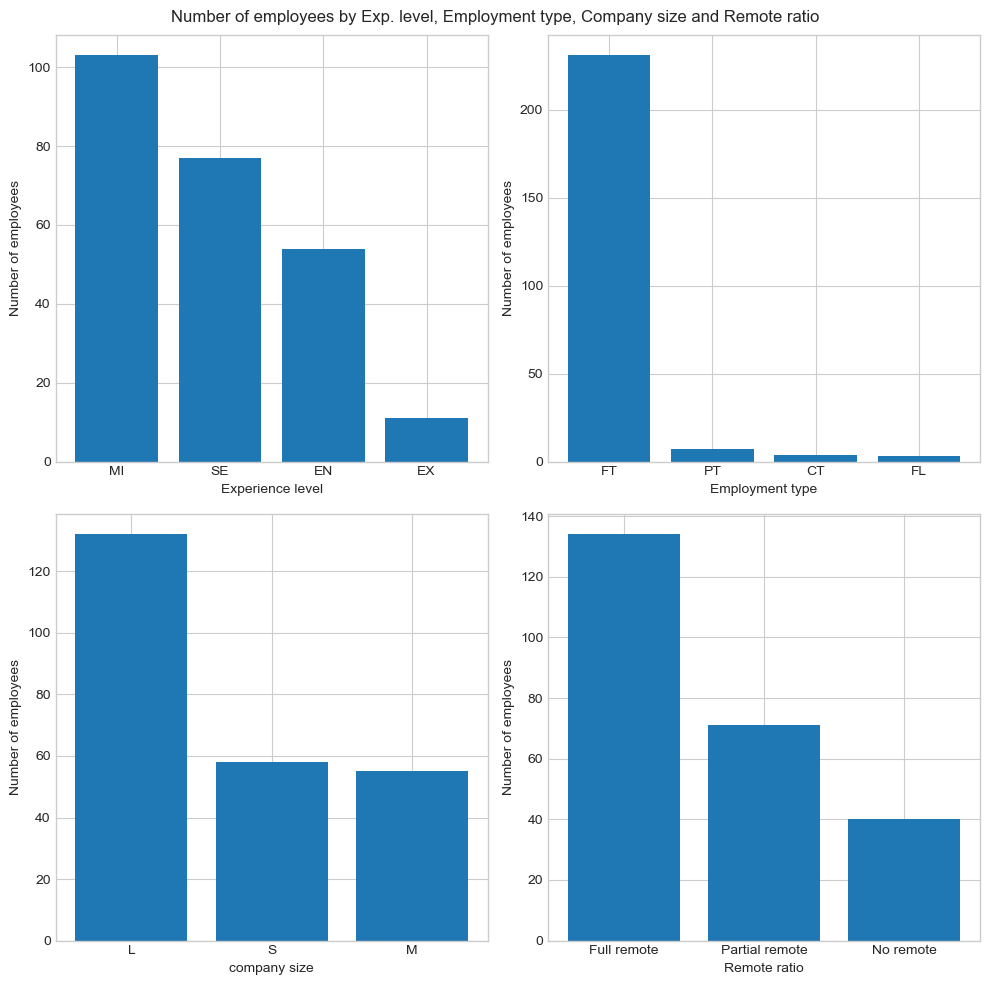

In [35]:
columns = ['experience_level','employment_type','company_size']

ex =data['experience_level'].value_counts()

em =data['employment_type'].value_counts()

co =data['company_size'].value_counts()

re =data['remote_ratio'].map({100:'Full remote',
                           50:'Partial remote',
                           0:'No remote'}).value_counts()
# PLOT A FIGURE UISNG MATPLOTILB SUBPLOTS OBJECT

fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].bar(ex.index,ex.values)
axs[0,0].set_xlabel('Experience level')
axs[0,0].set_ylabel('Number of employees')


axs[0,1].bar(em.index,em.values)
axs[0,1].set_xlabel('Employment type')
axs[0,1].set_ylabel('Number of employees')


axs[1,0].bar(co.index,co.values)
axs[1,0].set_xlabel('company size')
axs[1,0].set_ylabel('Number of employees')


axs[1,1].bar(re.index,re.values)
axs[1,1].set_xlabel('Remote ratio')
axs[1,1].set_ylabel('Number of employees')

plt.suptitle('Number of employees by Exp. level, Employment type, Company size and Remote ratio')
fig.tight_layout()
plt.show()

# 16. Which country has employed more employees in data science domain??


In [36]:
data['company_location'].value_counts().reset_index().set_index('index')

,company_location
index,
US,108
DE,19
IN,17
GB,16
FR,11
CA,11
ES,7
JP,4
AT,3


# 17. Top 5 countires by which employees are employed


<function matplotlib.pyplot.show(close=None, block=None)>

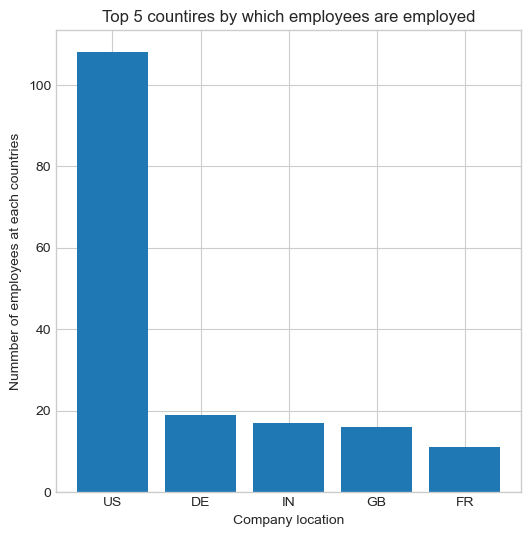

In [37]:
cl = data['company_location'].value_counts().reset_index().set_index('index').head()

plt.figure(figsize=(6,6))
plt.bar(np.array(cl.index), np.array(cl.values).reshape(-1))
plt.ylabel('Nummber of employees at each countries')
plt.xlabel('Company location')
plt.title('Top 5 countires by which employees are employed')
plt.show

USA is top country which has most number of jobs follwed by Germany(DE) and India(IN)

In [38]:
data['company_location'].nunique()

41

# 19. Distribution of employees by experience level and company size


<function matplotlib.pyplot.show(close=None, block=None)>

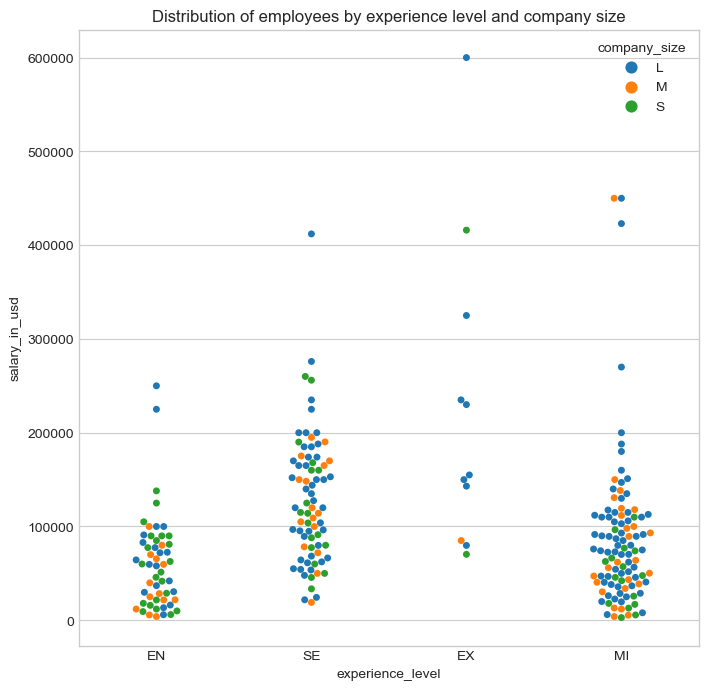

In [39]:
def swarm_plot(x, y, hue, data=data):
    plt.figure(figsize=(6,6))
    sns.swarmplot(x=x, y=y, hue=hue,data=data)
    plt.show
    
plt.figure(figsize=(8,8))
sns.swarmplot(x=data['experience_level'],
              y=data['salary_in_usd'],
              hue=data['company_size'],
              data=data)
plt.title("Distribution of employees by experience level and company size")
plt.show
